***Analysis of latest DfE attendance data***

Data releases used in this analysis:

2024/25 ytd Autumn term - https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/ec860485-2138-4b9d-9759-4a0a1d629aec

2024/25 daily Autumn term - https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/4f5acff8-8af0-4622-98be-054cafb24cf6

2023/24 ytd Autumn term - https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/1722df9c-85b5-4133-9f2b-8ff5a38653d0

2023/24 daily Autumn term - https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/57815838-fc5b-48e5-993b-3497accbe874

2022/23 ytd Autumn term - https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/e76122d1-63f3-4426-a94a-cf6a12ee26ed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from rich import print
import seaborn as sns

ytd_2425 = pd.read_csv('ees_ytd_data.csv')
daily_2425 = pd.read_csv('ees_daily_data.csv')

ytd_2324 = pd.read_csv('ees_ytd_data_2324.csv')
daily_2324 = pd.read_csv('ees_daily_data_2324.csv')

ytd_2223 = pd.read_csv('ees_ytd_data_2223.csv')

<br>

**Data cleaning**

A first glance at the data showed that the data was relatively clean with limited missing values. However, numeric and date conversions were needed. Additionally, some rows represented aggregations of multiple data points and needed to be removed.

In [2]:
#Remove all regional and national level rows

ytd_2425 = ytd_2425[~ytd_2425['geographic_level'].isin(['Regional', 'National'])]

ytd_2324 = ytd_2324[~ytd_2324['geographic_level'].isin(['Regional', 'National'])]

ytd_2223 = ytd_2223[~ytd_2223['geographic_level'].isin(['Regional', 'National'])]

In [3]:
# Switch to numeric and clear any remaining non-numeric values
# Change dates to datetime format

# 24/25 dataset

ytd_2425.loc[:, 'num_schools'] = pd.to_numeric(ytd_2425['num_schools'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['num_schools'])

ytd_2425.loc[:, 'attendance_perc'] = pd.to_numeric(ytd_2425['attendance_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['attendance_perc'])

ytd_2425.loc[:, 'authorised_absence_perc'] = pd.to_numeric(ytd_2425['authorised_absence_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['authorised_absence_perc'])

ytd_2425.loc[:, 'unauthorised_absence_perc'] = pd.to_numeric(ytd_2425['unauthorised_absence_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['unauthorised_absence_perc'])

ytd_2425.loc[:, 'illness_perc'] = pd.to_numeric(ytd_2425['illness_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['illness_perc'])

ytd_2425.loc[:, 'appointments_perc'] = pd.to_numeric(ytd_2425['appointments_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['appointments_perc'])

ytd_2425.loc[:, 'unauth_hol_perc'] = pd.to_numeric(ytd_2425['unauth_hol_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['unauth_hol_perc'])

ytd_2425.loc[:, 'unauth_oth_perc'] = pd.to_numeric(ytd_2425['unauth_oth_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['unauth_oth_perc'])

ytd_2425.loc[:, 'unauth_late_registers_closed_perc'] = pd.to_numeric(ytd_2425['unauth_late_registers_closed_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['unauth_late_registers_closed_perc'])

ytd_2425.loc[:, 'auth_excluded_perc'] = pd.to_numeric(ytd_2425['auth_excluded_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['auth_excluded_perc'])

ytd_2425.loc[:, 'auth_part_time_perc'] = pd.to_numeric(ytd_2425['auth_part_time_perc'], errors='coerce')
ytd_2425 = ytd_2425.dropna(subset=['auth_part_time_perc'])

daily_2425['attendance_date'] = pd.to_datetime(daily_2425['attendance_date'], format='%d/%m/%Y')

daily_2425.loc[:, 'attendance_perc'] = pd.to_numeric(daily_2425['attendance_perc'], errors='coerce')
daily_2425 = daily_2425.dropna(subset=['attendance_perc'])

daily_2425.loc[:, 'num_schools'] = pd.to_numeric(daily_2425['num_schools'], errors='coerce')
daily_2425 = daily_2425.dropna(subset=['num_schools'])


# 23/24 dataset

ytd_2324.loc[:, 'num_schools'] = pd.to_numeric(ytd_2324['num_schools'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['num_schools'])

ytd_2324.loc[:, 'attendance_perc'] = pd.to_numeric(ytd_2324['attendance_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['attendance_perc'])

ytd_2324.loc[:, 'authorised_absence_perc'] = pd.to_numeric(ytd_2324['authorised_absence_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['authorised_absence_perc'])

ytd_2324.loc[:, 'unauthorised_absence_perc'] = pd.to_numeric(ytd_2324['unauthorised_absence_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['unauthorised_absence_perc'])

ytd_2324.loc[:, 'illness_perc'] = pd.to_numeric(ytd_2324['illness_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['illness_perc'])

ytd_2324.loc[:, 'appointments_perc'] = pd.to_numeric(ytd_2324['appointments_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['appointments_perc'])

ytd_2324.loc[:, 'unauth_hol_perc'] = pd.to_numeric(ytd_2324['unauth_hol_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['unauth_hol_perc'])

ytd_2324.loc[:, 'unauth_oth_perc'] = pd.to_numeric(ytd_2324['unauth_oth_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['unauth_oth_perc'])

ytd_2324.loc[:, 'unauth_late_registers_closed_perc'] = pd.to_numeric(ytd_2324['unauth_late_registers_closed_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['unauth_late_registers_closed_perc'])

ytd_2324.loc[:, 'auth_excluded_perc'] = pd.to_numeric(ytd_2324['auth_excluded_perc'], errors='coerce')
ytd_2324 = ytd_2324.dropna(subset=['auth_excluded_perc'])

daily_2324['attendance_date'] = pd.to_datetime(daily_2324['attendance_date'], format='%d/%m/%Y')

daily_2324.loc[:, 'attendance_perc'] = pd.to_numeric(daily_2324['attendance_perc'], errors='coerce')
daily_2324 = daily_2324.dropna(subset=['attendance_perc'])

daily_2324.loc[:, 'num_schools'] = pd.to_numeric(daily_2324['num_schools'], errors='coerce')
daily_2324 = daily_2324.dropna(subset=['num_schools'])



# 22/23 dataset

ytd_2223.loc[:, 'num_schools'] = pd.to_numeric(ytd_2223['num_schools'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['num_schools'])

ytd_2223.loc[:, 'attendance_perc'] = pd.to_numeric(ytd_2223['attendance_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['attendance_perc'])

ytd_2223.loc[:, 'authorised_absence_perc'] = pd.to_numeric(ytd_2223['authorised_absence_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['authorised_absence_perc'])

ytd_2223.loc[:, 'unauthorised_absence_perc'] = pd.to_numeric(ytd_2223['unauthorised_absence_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['unauthorised_absence_perc'])

ytd_2223.loc[:, 'illness_perc'] = pd.to_numeric(ytd_2223['illness_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['illness_perc'])

ytd_2223.loc[:, 'appointments_perc'] = pd.to_numeric(ytd_2223['appointments_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['appointments_perc'])

ytd_2223.loc[:, 'unauth_hol_perc'] = pd.to_numeric(ytd_2223['unauth_hol_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['unauth_hol_perc'])

ytd_2223.loc[:, 'unauth_oth_perc'] = pd.to_numeric(ytd_2223['unauth_oth_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['unauth_oth_perc'])

ytd_2223.loc[:, 'unauth_late_registers_closed_perc'] = pd.to_numeric(ytd_2223['unauth_late_registers_closed_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['unauth_late_registers_closed_perc'])

ytd_2223.loc[:, 'auth_excluded_perc'] = pd.to_numeric(ytd_2223['auth_excluded_perc'], errors='coerce')
ytd_2223 = ytd_2223.dropna(subset=['auth_excluded_perc'])

<br>

**Initial data analysis**

As each row represents a different local authority, a weighting is needed to account for the different number of schools each LA is contributing to the average.

Whilst the report will focus on 24/25 data, calculations have been made for 23/24 and 22/23 for the sake of comparison and so that context from previous years can be included in the report where appropriate.

In [4]:
print("[bold]Attendance measures 24/25:[/bold]")

#Weighted mean 24/25
weighted_mean_2425 = (ytd_2425['attendance_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f"Weighted mean attendance: {weighted_mean_2425:.2f}%")

#Weighted standard deviation 24/25
weighted_std_dev_2425 = ((ytd_2425['num_schools'] * (ytd_2425['attendance_perc'] - ((ytd_2425['attendance_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum())) ** 2).sum() / ytd_2425['num_schools'].sum()) ** 0.5
print(f"Weighted standard deviation: {weighted_std_dev_2425:.2f}")

#Weighted mean for primary schools 24/25
primary_schools_2425 = ytd_2425[ytd_2425['education_phase'] == 'Primary']
weighted_mean_primary_2425 = (primary_schools_2425['attendance_perc'] * primary_schools_2425['num_schools']).sum() / primary_schools_2425['num_schools'].sum()
print(f"Weighted mean for primary schools: {weighted_mean_primary_2425:.2f}%")

#Weighted mean for secondary schools 24/25
secondary_schools_2425 = ytd_2425[ytd_2425['education_phase'] == 'Secondary']
weighted_mean_secondary_2425 = (secondary_schools_2425['attendance_perc'] * secondary_schools_2425['num_schools']).sum() / secondary_schools_2425['num_schools'].sum()
print(f"Weighted mean for secondary schools: {weighted_mean_secondary_2425:.2f}%")

#Weighted mean for special schools 24/25
special_schools_2425 = ytd_2425[ytd_2425['education_phase'] == 'Special']
weighted_mean_special_2425 = (special_schools_2425['attendance_perc'] * special_schools_2425['num_schools']).sum() / special_schools_2425['num_schools'].sum()
print(f"Weighted mean for special schools: {weighted_mean_special_2425:.2f}%")

#Weighted mean by region 24/25
weighted_mean_by_region_2425 = (
    ytd_2425.groupby('region_name', as_index=False)
    .agg(weighted_mean_2425=('attendance_perc', lambda x: (x * ytd_2425.loc[x.index, 'num_schools']).sum() / ytd_2425.loc[x.index, 'num_schools'].sum()))
)

weighted_mean_by_region_2425['weighted_mean_2425'] = weighted_mean_by_region_2425['weighted_mean_2425'].round(2)

weighted_mean_by_region_2425 = weighted_mean_by_region_2425.sort_values(by='weighted_mean_2425', ascending=False)

print("Weighted mean by region:\n", weighted_mean_by_region_2425)



print("\n\n\n[bold]Attendance measures 23/24:[/bold]")

#Weighted mean 23/24
weighted_mean_2324 = (ytd_2324['attendance_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f"Weighted mean attendance: {weighted_mean_2324:.2f}%")

#Weighted standard deviation 23/24
weighted_std_dev_2324 = ((ytd_2324['num_schools'] * (ytd_2324['attendance_perc'] - ((ytd_2324['attendance_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum())) ** 2).sum() / ytd_2324['num_schools'].sum()) ** 0.5
print(f"Weighted standard deviation: {weighted_std_dev_2324:.2f}")

#Weighted mean for primary schools 23/24
primary_schools_2324 = ytd_2324[ytd_2324['school_type'] == 'Primary']
weighted_mean_primary_2324 = (primary_schools_2324['attendance_perc'] * primary_schools_2324['num_schools']).sum() / primary_schools_2324['num_schools'].sum()
print(f"Weighted mean for primary schools: {weighted_mean_primary_2324:.2f}%")

#Weighted mean for secondary schools 23/24
secondary_schools_2324 = ytd_2324[ytd_2324['school_type'] == 'Secondary']
weighted_mean_secondary_2324 = (secondary_schools_2324['attendance_perc'] * secondary_schools_2324['num_schools']).sum() / secondary_schools_2324['num_schools'].sum()
print(f"Weighted mean for secondary schools: {weighted_mean_secondary_2324:.2f}%")

#Weighted mean for special schools 23/24
special_schools_2324 = ytd_2324[ytd_2324['school_type'] == 'Special']
weighted_mean_special_2324 = (special_schools_2324['attendance_perc'] * special_schools_2324['num_schools']).sum() / special_schools_2324['num_schools'].sum()
print(f"Weighted mean for special schools: {weighted_mean_special_2324:.2f}%")

#Weighted mean by region 23/24
weighted_mean_by_region_2324 = (
    ytd_2324.groupby('region_name', as_index=False)
    .agg(weighted_mean_2324=('attendance_perc', lambda x: (x * ytd_2324.loc[x.index, 'num_schools']).sum() / ytd_2324.loc[x.index, 'num_schools'].sum()))
)

weighted_mean_by_region_2324['weighted_mean_2324'] = weighted_mean_by_region_2324['weighted_mean_2324'].round(2)

weighted_mean_by_region_2324 = weighted_mean_by_region_2324.sort_values(by='weighted_mean_2324', ascending=False)

print("Weighted mean by region:\n", weighted_mean_by_region_2324)



print("\n\n\n[bold]Attendance averages for 22/23:[/bold]")

#Weighted mean 22/23
weighted_mean_2223 = (ytd_2223['attendance_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f"Weighted mean attendance: {weighted_mean_2223:.2f}%")

#Weighted standard deviation 22/23
weighted_std_dev_2223 = ((ytd_2223['num_schools'] * (ytd_2223['attendance_perc'] - ((ytd_2223['attendance_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum())) ** 2).sum() / ytd_2223['num_schools'].sum()) ** 0.5
print(f"Weighted standard deviation: {weighted_std_dev_2223:.2f}")

#Weighted mean for primary schools 22/23
primary_schools_2223 = ytd_2223[ytd_2223['school_type'] == 'Primary']
weighted_mean_primary_2223 = (primary_schools_2223['attendance_perc'] * primary_schools_2223['num_schools']).sum() / primary_schools_2223['num_schools'].sum()
print(f"Weighted mean for primary schools: {weighted_mean_primary_2223:.2f}%")

#Weighted mean for secondary schools 22/23
secondary_schools_2223 = ytd_2223[ytd_2223['school_type'] == 'Secondary']
weighted_mean_secondary_2223 = (secondary_schools_2223['attendance_perc'] * secondary_schools_2223['num_schools']).sum() / secondary_schools_2223['num_schools'].sum()
print(f"Weighted mean for secondary schools: {weighted_mean_secondary_2223:.2f}%")

#Weighted mean by region 22/23
weighted_mean_by_region_2223 = (
    ytd_2223.groupby('region_name', as_index=False)
    .agg(weighted_mean_2223=('attendance_perc', lambda x: (x * ytd_2223.loc[x.index, 'num_schools']).sum() / ytd_2223.loc[x.index, 'num_schools'].sum()))
)

weighted_mean_by_region_2223['weighted_mean_2223'] = weighted_mean_by_region_2223['weighted_mean_2223'].round(2)

weighted_mean_by_region_2223 = weighted_mean_by_region_2223.sort_values(by='weighted_mean_2223', ascending=False)

print("Weighted mean by region:\n", weighted_mean_by_region_2223)

Attendance measures 24/25:

Weighted mean attendance: 94.02%

Weighted standard deviation: 1.98

Weighted mean for primary schools: 94.86%

Weighted mean for secondary schools: 92.04%

Weighted mean for special schools: 87.31%

Weighted mean by region:
                 region_name  weighted_mean_2425
4                North West               94.17
0             East Midlands               94.16
1           East of England               94.16
8  Yorkshire and The Humber               94.03
2                    London               93.97
5                South East               93.96
6                South West               93.96
3                North East               93.85
7             West Midlands               93.84

Attendance measures 23/24:

Weighted mean attendance: 94.04%

Weighted standard deviation: 1.96

Weighted mean for primary schools: 94.86%

Weighted mean for secondary schools: 91.72%

Weighted mean for special schools: 87.46%

Weighted mean by region:
                 region_name  weighted_mean_2324
2                    London               94.22
1           East of England               94.21
5                South East               94.11
0             East Midlands               94.10
7             West Midlands               94.01
4                North West               94.00
6                South West               94.00
8  Yorkshire and The Humber               93.92
3                North East               93.41

Attendance averages for 22/23:

Weighted mean attendance: 93.33%

Weighted standard deviation: 1.82

Weighted mean for primary schools: 94.05%

Weighted mean for secondary schools: 91.26%

Weighted mean by region:
                 region_name  weighted_mean_2223
4                North West               93.53
0             East Midlands               93.46
1           East of England               93.33
5                South East               93.30
6                South West               93.28
2                    London               93.27
7             West Midlands               93.26
3                North East               93.23
8  Yorkshire and The Humber               93.22

<br><br>

**Further data analysis**

A deeper dive into the reasons for absence. Once again, whilst 24/25 data will be the focus, calculations for the previous two years have also been produced for comparison. Note: Absence due to adapted timetables was not measured prior to 24/25. 

In [5]:
#24/25
print("[bold]Analysis of reasons for absence 24/25:[/bold]")

weighted_mean_auth_2425 = (ytd_2425['authorised_absence_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f"\nWeighted mean authorised absence: {weighted_mean_auth_2425:.2f}%")

weighted_mean_illness_2425 = (ytd_2425['illness_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f"\n -Weighted mean illness percentage: {weighted_mean_illness_2425:.2f}%")

weighted_mean_appts_2425 = (ytd_2425['appointments_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f"\n -Weighted mean appointments percentage: {weighted_mean_appts_2425:.2f}%")

weighted_mean_exclusions_2425 = (ytd_2425['auth_excluded_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f" -Weighted mean exclusions percentage: {weighted_mean_exclusions_2425:.2f}%")

weighted_mean_adapted_timetables_2425 = (ytd_2425['auth_part_time_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f" -Weighted mean adapted timetables percentage: {weighted_mean_adapted_timetables_2425:.2f}%")

weighted_mean_unauth_2425 = (ytd_2425['unauthorised_absence_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f"\n\nWeighted mean unauthorised absence: {weighted_mean_unauth_2425:.2f}%")

weighted_mean_holidays_2425 = (ytd_2425['unauth_hol_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f" -Weighted mean holidays percentage: {weighted_mean_holidays_2425:.2f}%")

weighted_mean_late_2425 = (ytd_2425['unauth_late_registers_closed_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f" -Weighted mean late percentage: {weighted_mean_late_2425:.2f}%")

weighted_mean_late_2425 = (ytd_2425['unauth_oth_perc'] * ytd_2425['num_schools']).sum() / ytd_2425['num_schools'].sum()
print(f" -Weighted mean other unauthorised percentage: {weighted_mean_late_2425:.2f}%")

weighted_mean_unauth_by_region_2425 = (
    ytd_2425.groupby('region_name', as_index=False)
    .agg(weighted_mean_unauth_2425=('unauthorised_absence_perc', lambda x: (x * ytd_2425.loc[x.index, 'num_schools']).sum() / ytd_2425.loc[x.index, 'num_schools'].sum()))
)
weighted_mean_unauth_by_region_2425['weighted_mean_unauth_2425'] = weighted_mean_unauth_by_region_2425['weighted_mean_unauth_2425'].round(2)
weighted_mean_unauth_by_region_2425 = weighted_mean_unauth_by_region_2425.sort_values(by='weighted_mean_unauth_2425', ascending=False)
print("\n\nWeighted mean unauthorised absence by region:\n", weighted_mean_unauth_by_region_2425)



#23/24
print("\n\n\n[bold]Analysis of reasons for absence 23/24:[/bold]")

weighted_mean_auth_2324 = (ytd_2324['authorised_absence_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f"\nWeighted mean authorised absence: {weighted_mean_auth_2324:.2f}%")

weighted_mean_illness_2324 = (ytd_2324['illness_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f"\n -Weighted mean illness percentage: {weighted_mean_illness_2324:.2f}%")

weighted_mean_appts_2324 = (ytd_2324['appointments_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f"\n -Weighted mean appointments percentage: {weighted_mean_appts_2324:.2f}%")

weighted_mean_exclusions_2324 = (ytd_2324['auth_excluded_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f" -Weighted mean exclusions percentage: {weighted_mean_exclusions_2324:.2f}%")

weighted_mean_unauth_2324 = (ytd_2324['unauthorised_absence_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f"\n\nWeighted mean unauthorised absence: {weighted_mean_unauth_2324:.2f}%")

weighted_mean_holidays_2324 = (ytd_2324['unauth_hol_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f" -Weighted mean holidays percentage: {weighted_mean_holidays_2324:.2f}%")

weighted_mean_late_2324 = (ytd_2324['unauth_late_registers_closed_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f" -Weighted mean late percentage: {weighted_mean_late_2324:.2f}%")

weighted_mean_late_2324 = (ytd_2324['unauth_oth_perc'] * ytd_2324['num_schools']).sum() / ytd_2324['num_schools'].sum()
print(f" -Weighted mean other unauthorised percentage: {weighted_mean_late_2324:.2f}%")

weighted_mean_unauth_by_region_2324 = (
    ytd_2324.groupby('region_name', as_index=False)
    .agg(weighted_mean_unauth_2324=('unauthorised_absence_perc', lambda x: (x * ytd_2324.loc[x.index, 'num_schools']).sum() / ytd_2324.loc[x.index, 'num_schools'].sum()))
)
weighted_mean_unauth_by_region_2324['weighted_mean_unauth_2324'] = weighted_mean_unauth_by_region_2324['weighted_mean_unauth_2324'].round(2)
weighted_mean_unauth_by_region_2324 = weighted_mean_unauth_by_region_2324.sort_values(by='weighted_mean_unauth_2324', ascending=False)
print("\n\nWeighted mean unauthorised absence by region:\n", weighted_mean_unauth_by_region_2324)




#22/23
print("\n\n\n[bold]Analysis of reasons for absence 24/25:[/bold]")

weighted_mean_auth_2223 = (ytd_2223['authorised_absence_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f"\nWeighted mean authorised absence: {weighted_mean_auth_2223:.2f}%")

weighted_mean_illness_2223 = (ytd_2223['illness_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f"\n -Weighted mean illness percentage: {weighted_mean_illness_2223:.2f}%")

weighted_mean_appts_2223 = (ytd_2223['appointments_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f"\n -Weighted mean appointments percentage: {weighted_mean_appts_2223:.2f}%")

weighted_mean_exclusions_2223 = (ytd_2223['auth_excluded_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f" -Weighted mean exclusions percentage: {weighted_mean_exclusions_2223:.2f}%")

weighted_mean_unauth_2223 = (ytd_2223['unauthorised_absence_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f"\n\nWeighted mean unauthorised absence: {weighted_mean_unauth_2223:.2f}%")

weighted_mean_holidays_2223 = (ytd_2223['unauth_hol_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f" -Weighted mean holidays percentage: {weighted_mean_holidays_2223:.2f}%")

weighted_mean_late_2223 = (ytd_2223['unauth_late_registers_closed_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f" -Weighted mean late percentage: {weighted_mean_late_2223:.2f}%")

weighted_mean_late_2223 = (ytd_2223['unauth_oth_perc'] * ytd_2223['num_schools']).sum() / ytd_2223['num_schools'].sum()
print(f" -Weighted mean other unauthorised percentage: {weighted_mean_late_2223:.2f}%")

weighted_mean_unauth_by_region_2223 = (
    ytd_2223.groupby('region_name', as_index=False)
    .agg(weighted_mean_unauth_2223=('unauthorised_absence_perc', lambda x: (x * ytd_2223.loc[x.index, 'num_schools']).sum() / ytd_2223.loc[x.index, 'num_schools'].sum()))
)
weighted_mean_unauth_by_region_2223['weighted_mean_unauth_2223'] = weighted_mean_unauth_by_region_2223['weighted_mean_unauth_2223'].round(2)
weighted_mean_unauth_by_region_2223 = weighted_mean_unauth_by_region_2223.sort_values(by='weighted_mean_unauth_2223', ascending=False)
print("\n\nWeighted mean unauthorised absence by region:\n", weighted_mean_unauth_by_region_2223)


Analysis of reasons for absence 24/25:

Weighted mean authorised absence: 4.28%

-Weighted mean illness percentage: 3.27%

-Weighted mean appointments percentage: 0.31%

-Weighted mean exclusions percentage: 0.08%

-Weighted mean adapted timetables percentage: 0.19%

Weighted mean unauthorised absence: 1.69%

-Weighted mean holidays percentage: 0.48%

-Weighted mean late percentage: 0.18%

-Weighted mean other unauthorised percentage: 0.95%

Weighted mean unauthorised absence by region:
                 region_name  weighted_mean_unauth_2425
3                North East                       2.05
8  Yorkshire and The Humber                       2.01
2                    London                       1.84
4                North West                       1.83
7             West Midlands                       1.75
0             East Midlands                       1.57
5                South East                       1.51
6                South West                       1.48
1           East of England                       1.45

Analysis of reasons for absence 23/24:

Weighted mean authorised absence: 4.25%

-Weighted mean illness percentage: 3.31%

-Weighted mean appointments percentage: 0.29%

-Weighted mean exclusions percentage: 0.08%

Weighted mean unauthorised absence: 1.71%

-Weighted mean holidays percentage: 0.48%

-Weighted mean late percentage: 0.15%

-Weighted mean other unauthorised percentage: 0.98%

Weighted mean unauthorised absence by region:
                 region_name  weighted_mean_unauth_2324
3                North East                       2.15
8  Yorkshire and The Humber                       2.08
4                North West                       1.84
7             West Midlands                       1.76
2                    London                       1.75
0             East Midlands                       1.62
6                South West                       1.53
1           East of England                       1.48
5                South East                       1.47

Analysis of reasons for absence 24/25:

Weighted mean authorised absence: 5.04%

-Weighted mean illness percentage: 4.17%

-Weighted mean appointments percentage: 0.28%

-Weighted mean exclusions percentage: 0.06%

Weighted mean unauthorised absence: 1.63%

-Weighted mean holidays percentage: 0.44%

-Weighted mean late percentage: 0.13%

-Weighted mean other unauthorised percentage: 0.91%

Weighted mean unauthorised absence by region:
                 region_name  weighted_mean_unauth_2223
8  Yorkshire and The Humber                       2.00
3                North East                       1.91
2                    London                       1.76
4                North West                       1.73
7             West Midlands                       1.67
0             East Midlands                       1.49
5                South East                       1.47
1           East of England                       1.43
6                South West                       1.43

<br><br>

***Local authority-level analysis***

Each local authority has a separate row for 'primary, 'secondary' and 'special' so aggregate figures need to be calculated in order to compare between local authorities. These figures will need to be weighted as each local authority will have a different number of primary, secondary and special schools.

In [6]:
#24/25
print("[bold]Local authority-level analysis 24/25[/bold]")


#Attendance by local authority 24/25
mean_by_la_2425 = (
    ytd_2425.groupby('la_name', as_index=False)
    .agg(weighted_mean_attendance_2425=('attendance_perc', lambda x: (x * ytd_2425.loc[x.index, 'num_schools']).sum() / ytd_2425.loc[x.index, 'num_schools'].sum()))
)

mean_by_la_2425['weighted_mean_attendance_2425'] = mean_by_la_2425['weighted_mean_attendance_2425'].astype(float).round(2)

sorted_mean_by_la_2425 = mean_by_la_2425.sort_values(by='weighted_mean_attendance_2425', ascending=False)

top_5_2425 = sorted_mean_by_la_2425.head(5)
bottom_5_2425 = sorted_mean_by_la_2425.tail(5)

print("\n\nTop 5 local authorities by attendance 24/25\n", top_5_2425)
print("\n\nBottom 5 local authorities by attendance 24/25\n", bottom_5_2425)
print(f"\n\nMean local authority attendance: {weighted_mean_2425:.2f}")



#Unauthorised absence by local authority 24/25
mean_unauthorised_by_la_2425 = (
    ytd_2425.groupby('la_name', as_index=False)
    .agg(weighted_mean_unauthorised_2425=('unauthorised_absence_perc', lambda x: (x * ytd_2425.loc[x.index, 'num_schools']).sum() / ytd_2425.loc[x.index, 'num_schools'].sum()))
)

mean_unauthorised_by_la_2425['weighted_mean_unauthorised_2425'] = mean_unauthorised_by_la_2425['weighted_mean_unauthorised_2425'].astype(float).round(2)

sorted_mean_unauthorised_by_la_2425 = mean_unauthorised_by_la_2425.sort_values(by='weighted_mean_unauthorised_2425', ascending=False)
top_5_AT_2425 = sorted_mean_unauthorised_by_la_2425.head(5)
bottom_5_AT_2425 = sorted_mean_unauthorised_by_la_2425.tail(5)

print("\n\n\nTop 5 local authorities by unauthorised absence 24/25\n", top_5_AT_2425)
print("\n\nBottom 5 local authorities by unauthorised absence 24/25\n", bottom_5_AT_2425)
print(f"\n\nMean local authority unauthorised absence: {weighted_mean_unauth_2425:.2f}")


#Reason for absence - exclusion, by local authority 24/25
mean_excluded_by_la_2425 = (
    ytd_2425.groupby('la_name', as_index=False)
    .agg(weighted_mean_excluded_2425=('auth_excluded_perc', lambda x: (x * ytd_2425.loc[x.index, 'num_schools']).sum() / ytd_2425.loc[x.index, 'num_schools'].sum()))
)

mean_excluded_by_la_2425['weighted_mean_excluded_2425'] = mean_excluded_by_la_2425['weighted_mean_excluded_2425'].astype(float).round(2)

sorted_mean_excluded_by_la_2425 = mean_excluded_by_la_2425.sort_values(by='weighted_mean_excluded_2425', ascending=False)
top_5_excluded_2425 = sorted_mean_excluded_by_la_2425.head(5)
bottom_5_excluded_2425 = sorted_mean_excluded_by_la_2425.tail(5)

print("\n\n\nTop 5 local authorities by reason for absence - excluded 24/25\n", top_5_excluded_2425)
print("\n\nBottom 5 local authorities by reason for absence - excluded 24/25\n", bottom_5_excluded_2425)
print(f"\n\nMean local authority reason for absence - excluded: {weighted_mean_exclusions_2425:.2f}")


#Reasons for absence - adapted timetables, by local authority 24/25
mean_AT_by_la_2425 = (
    ytd_2425.groupby('la_name', as_index=False)
    .agg(weighted_mean_AT_2425=('auth_part_time_perc', lambda x: (x * ytd_2425.loc[x.index, 'num_schools']).sum() / ytd_2425.loc[x.index, 'num_schools'].sum()))
)

mean_AT_by_la_2425['weighted_mean_AT_2425'] = mean_AT_by_la_2425['weighted_mean_AT_2425'].astype(float).round(2)

sorted_mean_AT_by_la_2425 = mean_AT_by_la_2425.sort_values(by='weighted_mean_AT_2425', ascending=False)
top_5_AT_2425 = sorted_mean_AT_by_la_2425.head(5)
bottom_5_AT_2425 = sorted_mean_AT_by_la_2425.tail(5)

print("\n\n\nTop 5 local authorities by reason for absence - adapted timetable 24/25\n", top_5_AT_2425)
print("\n\nBottom 5 local authorities by reason for absence - adapted timetable 24/25\n", bottom_5_AT_2425)
print(f"\n\nMean local authority reason for absence - adapted timetable: {weighted_mean_adapted_timetables_2425:.2f}")


#Adapted timetables as a percentage of absence 24/25

mean_by_la_2425['absence_perc'] = 100 - mean_by_la_2425['weighted_mean_attendance_2425']

mean_AT_by_la_2425 = mean_AT_by_la_2425.merge(mean_by_la_2425[['la_name', 'absence_perc']], on='la_name')

mean_AT_by_la_2425['AT_as_pct_of_absence'] = (
    mean_AT_by_la_2425['weighted_mean_AT_2425'] / mean_AT_by_la_2425['absence_perc'] * 100
)

sorted_mean_AT_by_la_2425 = mean_AT_by_la_2425.sort_values(by='AT_as_pct_of_absence', ascending=False)
top_5_AT_pct_2425 = sorted_mean_AT_by_la_2425.head(5)
bottom_5_AT_pct_2425 = sorted_mean_AT_by_la_2425.tail(5)

print("\n\n\nTop 5 local authorities by adapted timetable absences as percentage of absence 24/25\n", top_5_AT_pct_2425)
print("\n\nBottom 5 local authorities by adapted timetable absences as a percentage of overall absence - 24/25\n", bottom_5_AT_pct_2425)

mean_of_mean = mean_AT_by_la_2425['AT_as_pct_of_absence'].mean()

print(f"\n\nMean AT as percentage of absence: {mean_of_mean:.2f}")



#23/24
print("\n\n\n\n[bold]Local authority-level analysis 23/24[/bold]")


#Attendance by local authority 23/24
mean_by_la_2324 = (
    ytd_2324.groupby('la_name', as_index=False)
    .agg(weighted_mean_attendance_2324=('attendance_perc', lambda x: (x * ytd_2324.loc[x.index, 'num_schools']).sum() / ytd_2324.loc[x.index, 'num_schools'].sum()))
)

mean_by_la_2324['weighted_mean_attendance_2324'] = mean_by_la_2324['weighted_mean_attendance_2324'].astype(float).round(2)

sorted_mean_by_la_2324 = mean_by_la_2324.sort_values(by='weighted_mean_attendance_2324', ascending=False)

top_5_2324 = sorted_mean_by_la_2324.head(5)
bottom_5_2324 = sorted_mean_by_la_2324.tail(5)

print("\n\nTop 5 local authorities by attendance 23/24\n", top_5_2324)
print("\n\nBottom 5 local authorities by attendance 23/24\n", bottom_5_2324)


#Unauthorised absence by local authority 23/24
mean_unauthorised_by_la_2324 = (
    ytd_2324.groupby('la_name', as_index=False)
    .agg(weighted_mean_unauthorised_2324=('unauthorised_absence_perc', lambda x: (x * ytd_2324.loc[x.index, 'num_schools']).sum() / ytd_2324.loc[x.index, 'num_schools'].sum()))
)

mean_unauthorised_by_la_2324['weighted_mean_unauthorised_2324'] = mean_unauthorised_by_la_2324['weighted_mean_unauthorised_2324'].astype(float).round(2)

sorted_mean_unauthorised_by_la_2324 = mean_unauthorised_by_la_2324.sort_values(by='weighted_mean_unauthorised_2324', ascending=False)
top_5_AT_2324 = sorted_mean_unauthorised_by_la_2324.head(5)
bottom_5_AT_2324 = sorted_mean_unauthorised_by_la_2324.tail(5)

print("\n\n\nTop 5 local authorities by unauthorised absence 23/24\n", top_5_AT_2324)
print("\n\nBottom 5 local authorities by unauthorised absence 23/24\n", bottom_5_AT_2324)


#Reason for absence - exclusion, by local authority 23/24
mean_excluded_by_la_2324 = (
    ytd_2324.groupby('la_name', as_index=False)
    .agg(weighted_mean_excluded_2324=('auth_excluded_perc', lambda x: (x * ytd_2324.loc[x.index, 'num_schools']).sum() / ytd_2324.loc[x.index, 'num_schools'].sum()))
)

mean_excluded_by_la_2324['weighted_mean_excluded_2324'] = mean_excluded_by_la_2324['weighted_mean_excluded_2324'].astype(float).round(2)

sorted_mean_excluded_by_la_2324 = mean_excluded_by_la_2324.sort_values(by='weighted_mean_excluded_2324', ascending=False)
top_5_excluded_2324 = sorted_mean_excluded_by_la_2324.head(5)
bottom_5_excluded_2324 = sorted_mean_excluded_by_la_2324.tail(5)

print("\n\n\nTop 5 local authorities by reason for absence - excluded 23/24\n", top_5_excluded_2324)
print("\n\nBottom 5 local authorities by reason for absence - excluded 23/24\n", bottom_5_excluded_2324)

Local authority-level analysis 24/25

Top 5 local authorities by attendance 24/25
                      la_name  weighted_mean_attendance_2425
99      Richmond upon Thames                          95.09
102                  Rutland                          95.00
142  Westmorland and Furness                          94.96
131                 Trafford                          94.94
147                Wokingham                          94.94

Bottom 5 local authorities by attendance 24/25
              la_name  weighted_mean_attendance_2425
39       East Sussex                          92.97
64          Knowsley                          92.96
95        Portsmouth                          92.88
15  Bristol, City of                          92.80
58         Islington                          92.78

Mean local authority attendance: 94.02

Top 5 local authorities by unauthorised absence 24/25
                 la_name  weighted_mean_unauthorised_2425
64             Knowsley                             3.18
8             Blackpool                             3.17
89           Nottingham                             2.99
79  Newcastle upon Tyne                             2.87
72            Liverpool                             2.83

Bottom 5 local authorities by unauthorised absence 24/25
                       la_name  weighted_mean_unauthorised_2425
138            West Berkshire                             1.10
107                Shropshire                             1.08
147                 Wokingham                             1.05
53   Herefordshire, County of                             0.93
102                   Rutland                             0.88

Mean local authority unauthorised absence: 1.69

Top 5 local authorities by reason for absence - excluded 24/25
                  la_name  weighted_mean_excluded_2425
8              Blackpool                         0.16
75                Medway                         0.15
120       Stoke-on-Trent                         0.15
79   Newcastle upon Tyne                         0.14
95            Portsmouth                         0.14

Bottom 5 local authorities by reason for absence - excluded 24/25
                  la_name  weighted_mean_excluded_2425
50                Harrow                         0.04
0   Barking and Dagenham                         0.04
76                Merton                         0.03
99  Richmond upon Thames                         0.02
62  Kingston upon Thames                         0.02

Mean local authority reason for absence - excluded: 0.08

Top 5 local authorities by reason for absence - adapted timetable 24/25
            la_name  weighted_mean_AT_2425
95      Portsmouth                   0.61
110       Somerset                   0.45
57   Isle of Wight                   0.41
68       Leicester                   0.39
106      Sheffield                   0.38

Bottom 5 local authorities by reason for absence - adapted timetable 24/25
             la_name  weighted_mean_AT_2425
37           Ealing                   0.04
134  Waltham Forest                   0.03
51       Hartlepool                   0.03
13            Brent                   0.03
141     Westminster                   0.02

Mean local authority reason for absence - adapted timetable: 0.19

Top 5 local authorities by adapted timetable absences as percentage of absence 24/25
            la_name  weighted_mean_AT_2425  absence_perc  AT_as_pct_of_absence
95      Portsmouth                   0.61          7.12              8.567416
110       Somerset                   0.45          6.39              7.042254
57   Isle of Wight                   0.41          6.82              6.011730
68       Leicester                   0.39          6.77              5.760709
74      Manchester                   0.36          6.34              5.678233

Bottom 5 local authorities by adapted timetable absences as a percentage of overall absence - 24/25
             la_name  weighted_mean_AT_2425  absence_perc  AT_as_pct_of_absence
37           Ealing                   0.04          5.64              0.709220
13            Brent                   0.03          5.62              0.533808
51       Hartlepool                   0.03          6.02              0.498339
134  Waltham Forest                   0.03          6.09              0.492611
141     Westminster                   0.02          6.46              0.309598

Mean AT as percentage of absence: 2.74

Local authority-level analysis 23/24

Top 5 local authorities by attendance 23/24
                   la_name  weighted_mean_attendance_2324
99   Richmond upon Thames                          95.37
102               Rutland                          95.26
147             Wokingham                          94.92
13                  Brent                          94.90
136            Warrington                          94.87

Bottom 5 local authorities by attendance 23/24
            la_name  weighted_mean_attendance_2324
89      Nottingham                          92.89
77   Middlesbrough                          92.83
64        Knowsley                          92.80
122     Sunderland                          92.70
8        Blackpool                          92.61

Top 5 local authorities by unauthorised absence 23/24
           la_name  weighted_mean_unauthorised_2324
8       Blackpool                             3.53
64       Knowsley                             3.29
80         Newham                             3.11
89     Nottingham                             3.06
77  Middlesbrough                             2.97

Bottom 5 local authorities by unauthorised absence 23/24
                       la_name  weighted_mean_unauthorised_2324
1                      Barnet                             1.10
107                Shropshire                             1.07
50                     Harrow                             1.06
53   Herefordshire, County of                             0.95
102                   Rutland                             0.76

Top 5 local authorities by reason for absence - excluded 23/24
                  la_name  weighted_mean_excluded_2324
120       Stoke-on-Trent                         0.20
129               Torbay                         0.18
122           Sunderland                         0.17
79   Newcastle upon Tyne                         0.17
2               Barnsley                         0.16

Bottom 5 local authorities by reason for absence - excluded 23/24
                   la_name  weighted_mean_excluded_2324
130         Tower Hamlets                         0.03
99   Richmond upon Thames                         0.03
37                 Ealing                         0.03
50                 Harrow                         0.03
62   Kingston upon Thames                         0.02

<br><br>

***Pupil characteristics analysis***

Separate datasets have been merged to produce percentages by local authority for students with FSM and SEND.

Correlation coefficient: -0.5838702897210377

P-value: 3.585565200066343e-15

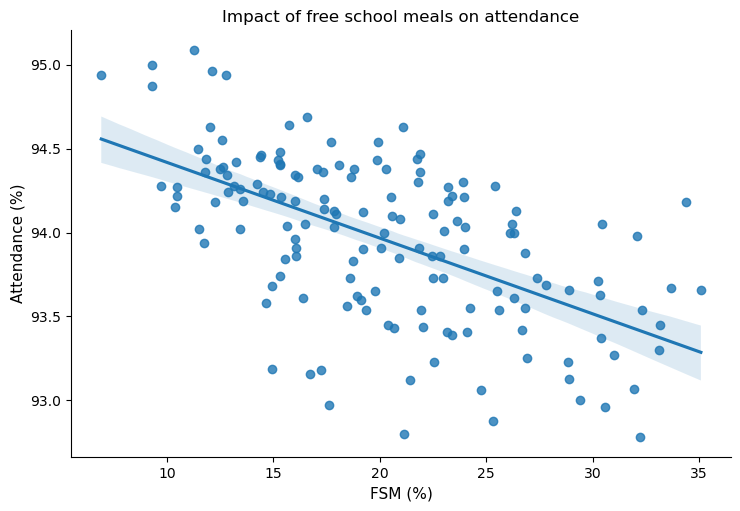

In [10]:
#FSM

FSM = pd.read_csv('spc_pupils_fsm.csv')

FSM['time_period'] = FSM['time_period'].astype(str)

FSM_filtered = FSM[
    (FSM['time_period'] == '202324')
]

LA_with_FSM = pd.merge(mean_by_la_2425, FSM_filtered[['la_name', 'percent_of_pupils']], on='la_name', how='left')

LA_with_FSM['FSM_percentage'] = pd.to_numeric(LA_with_FSM['percent_of_pupils'], errors='coerce')

corr_coefficient, p_value = stats.pearsonr(LA_with_FSM['weighted_mean_attendance_2425'], LA_with_FSM['FSM_percentage'])

print(f"Correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

sns.lmplot(x='percent_of_pupils', y='weighted_mean_attendance_2425', data=LA_with_FSM, aspect=1.5)
plt.title('Impact of free school meals on attendance')
plt.ylabel('Attendance (%)', fontsize=11)
plt.xlabel('FSM (%)', fontsize=11)
plt.show()

Correlation coefficient: -0.4381675885719388

P-value: 1.8370603356424564e-08

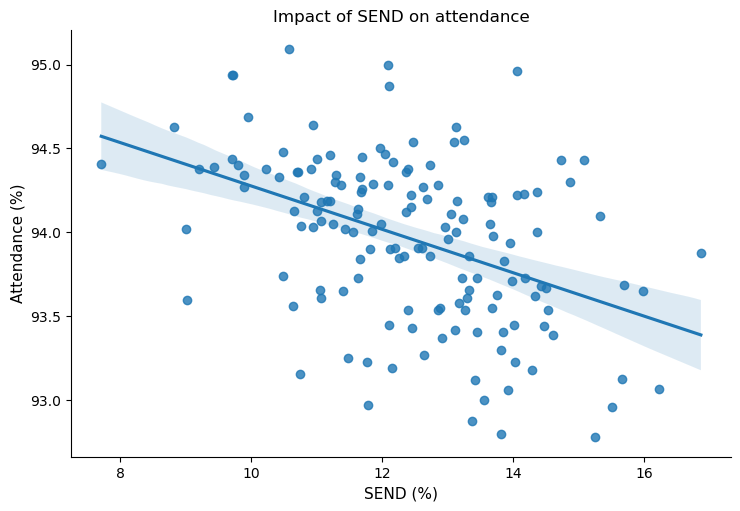

In [11]:
#SEND

SEND = pd.read_csv('sen_phase_type_new.csv')

SEND = SEND[~SEND['geographic_level'].isin(['Regional', 'National'])]

SEND = SEND[~SEND['phase_type_grouping'].isin(['Total'])]

SEND.loc[:, 'total_pupils'] = pd.to_numeric(SEND['total_pupils'], errors='coerce')
SEND = SEND.dropna(subset=['total_pupils'])

SEND.loc[:, 'sen_support'] = pd.to_numeric(SEND['sen_support'], errors='coerce')
SEND = SEND.dropna(subset=['sen_support'])

SEND_by_LA = SEND.groupby('la_name').agg({
    'sen_support': 'sum',
    'total_pupils': 'sum'
}).reset_index()

SEND_by_LA['SEND_perc'] = (SEND_by_LA['sen_support'] / SEND_by_LA['total_pupils']) * 100

SEND_by_LA_attendance = pd.merge(SEND_by_LA, mean_by_la_2425[['la_name', 'weighted_mean_attendance_2425']], on='la_name', how='left')

SEND_by_LA_attendance['weighted_mean_attendance_2425'] = pd.to_numeric(
    SEND_by_LA_attendance['weighted_mean_attendance_2425'], errors='coerce')
SEND_by_LA_attendance['SEND_perc'] = pd.to_numeric(
    SEND_by_LA_attendance['SEND_perc'], errors='coerce')

SEND_by_LA_attendance = SEND_by_LA_attendance.dropna(
    subset=['weighted_mean_attendance_2425', 'SEND_perc'])

corr_coefficient_SEND, p_value_SEND = stats.pearsonr(SEND_by_LA_attendance['weighted_mean_attendance_2425'], SEND_by_LA_attendance['SEND_perc'])

print(f"Correlation coefficient: {corr_coefficient_SEND}")
print(f"P-value: {p_value_SEND}")

sns.lmplot(x='SEND_perc', y='weighted_mean_attendance_2425', data=SEND_by_LA_attendance, aspect=1.5)
plt.title('Impact of SEND on attendance')
plt.ylabel('Attendance (%)', fontsize=11)
plt.xlabel('SEND (%)', fontsize=11)
plt.show()

<br><br>

***Time series analysis***

This analysis was ultimately not used in the final report. 

"Daily" dataset is used to plot attendance over time for the 24/25 Autumn term. The 23/24 Autumn term is also plotted to compare the trends.

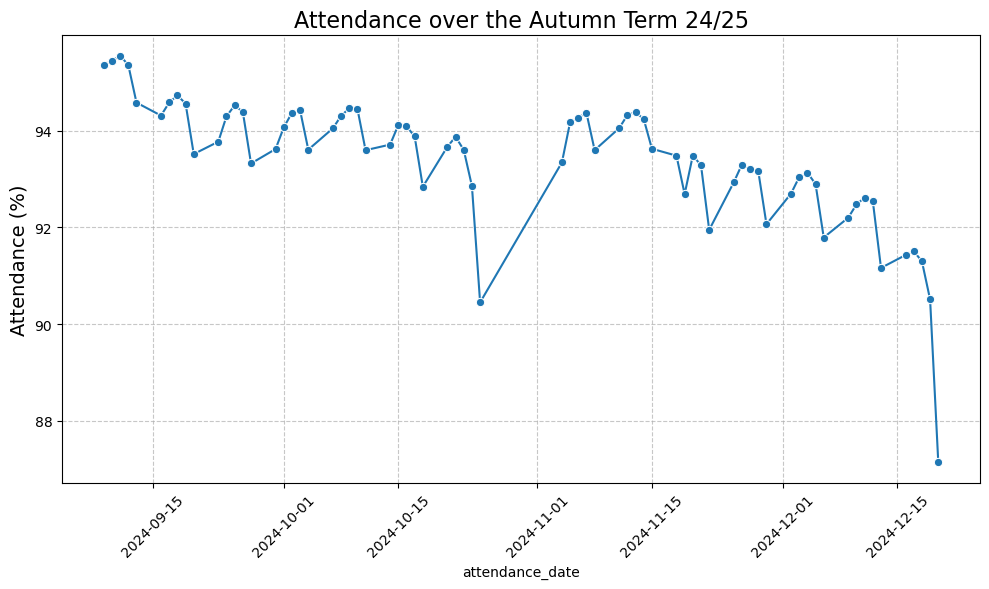

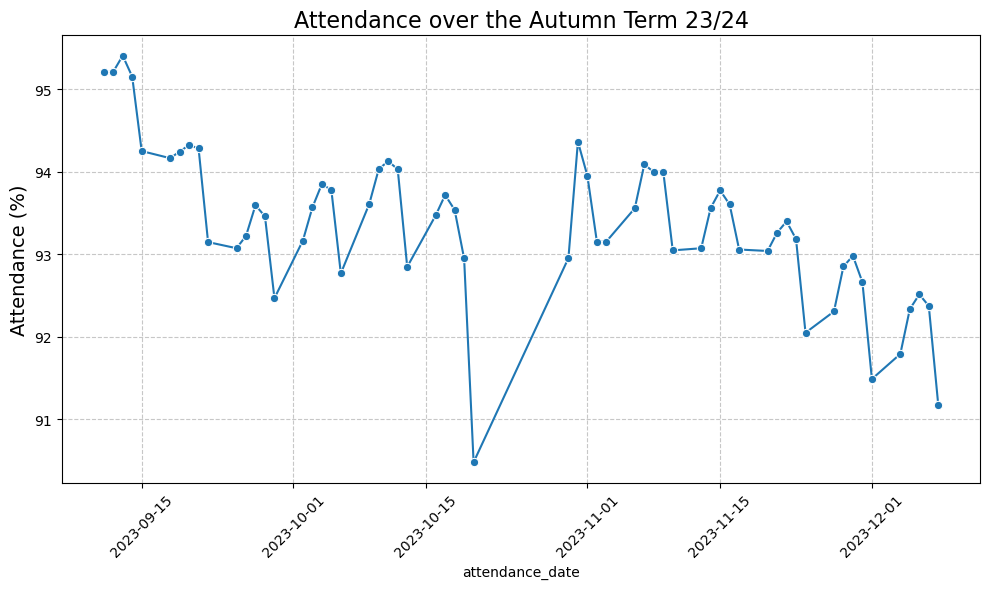

In [9]:
# 24/25 attendance over time plot
filtered_data_2425 = daily_2425[
    (daily_2425['geographic_level'] == 'National') &
    (daily_2425['education_phase'] == 'Total')
]

filtered_data_2425 = filtered_data_2425.sort_values(by='attendance_date')

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data_2425, x='attendance_date', y='attendance_perc', marker='o')

plt.title('Attendance over the Autumn Term 24/25', fontsize=16)
plt.ylabel('Attendance (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 23/24 attendance over time plot
filtered_data_2324 = daily_2324[
    (daily_2324['geographic_level'] == 'National') &
    (daily_2324['school_type'] == 'Total')
]

filtered_data_2324 = filtered_data_2324.sort_values(by='attendance_date')

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data_2324, x='attendance_date', y='attendance_perc', marker='o')

plt.title('Attendance over the Autumn Term 23/24', fontsize=16)
plt.ylabel('Attendance (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()